<a href="https://colab.research.google.com/github/zugzwang03/Machine-Learning-Materials/blob/main/deep_neural_network_python_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
import sklearn
import sklearn.datasets
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [99]:
X, Y = load_planar_dataset()
m = Y.shape[1]

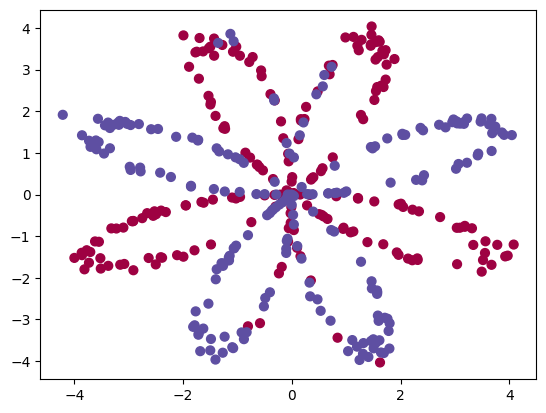

In [100]:
plt.scatter(X[0, :], X[1, :], c = Y, s = 40, cmap = plt.cm.Spectral);

In [101]:
W1 = np.random.randn(4, X.shape[0]) * 0.01
b1 = np.zeros(shape=(4, 1))

W2 = np.random.randn(Y.shape[0], 4) * 0.01
b2 = np.zeros(shape=(Y.shape[0], 1))

In [102]:
X.shape

(2, 400)

In [103]:
def forward_propagation(X, W1, b1, W2, b2):
  Z1 = np.dot(W1, X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)

  cache = {"Z1": Z1,
           "A1": A1,
           "Z2": Z2,
           "A2": A2}

  return A2, cache

In [104]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost_sum = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - cost_sum / m
    cost = np.squeeze(cost)
    return cost

In [105]:
def back_propagation(W1, b1, W2, b2, cache):
  learning_rate = 0.01
  A1 = cache['A1']
  A2 = cache['A2']
  # delta error; difference between Ypredicted and Yactual(ground truth labels)
  dZ2 = A2 - Y
  dW2 = (1 / m) * np.dot(dZ2, A1.T)
  db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)

  dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
  dW1 = (1 / m) * np.dot(dZ1, X.T)
  db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)

  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2
  return W1, W2, b1, b2

In [106]:
for i in range(0, 5000):

        # Forward propagation. Inputs: "X, parameters". return: "A2, cache".
        A2, cache = forward_propagation(X, W1, b1, W2, b2)

        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        W1, W2, b1, b2 = back_propagation(W1, b1, W2, b2, cache)


        # Print the cost every 1000 iterations
        if cost[0] and i % 1000 == 0:
            print ("Cost after iteration % i: % f" % (i, cost[0]))

Cost after iteration  0:  0.001732
Cost after iteration  1000:  0.001680
Cost after iteration  2000:  0.001382
Cost after iteration  3000:  0.001148
Cost after iteration  4000:  0.000807


In [107]:
y_pred = A2
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

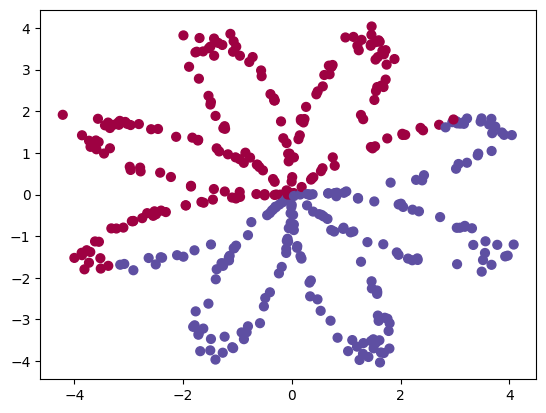

In [108]:
plt.scatter(X[0, :], X[1, :], c = y_pred, s = 40, cmap = plt.cm.Spectral);